<a href="https://colab.research.google.com/github/zhangzixuan1997/Python/blob/master/Student_Performace-A%20simple%20deep%20learning%20early%20stopping%20example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/My Drive/StudentsPerformance.csv")

# Generate dummies.
df = pd.concat([df,pd.get_dummies(df["gender"],prefix="gender")],axis=1)
df.drop("gender",axis=1, inplace=True)
df = pd.concat([df,pd.get_dummies(df["race/ethnicity"],prefix="race/ethnicity")],axis=1)
df.drop("race/ethnicity",axis=1, inplace=True)
df = pd.concat([df,pd.get_dummies(df["parental level of education"],prefix="parental level of education")],axis=1)
df.drop("parental level of education",axis=1, inplace=True)
df = pd.concat([df,pd.get_dummies(df["lunch"],prefix="lunch")],axis=1)
df.drop("lunch",axis=1, inplace=True)
df = pd.concat([df,pd.get_dummies(df["test preparation course"],prefix="test preparation course")],axis=1)
df.drop("test preparation course",axis=1, inplace=True)

# Create a total score
df["total score"] = df["math score"]+df["reading score"]+df["writing score"]
x_columns = df.columns.drop("math score").drop("reading score").drop("writing score").drop("total score")
x = df[x_columns].values
y = df["total score"].values

#Create train test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

#Build the neural network
model = Sequential()
model.add(Dense(25,input_dim=x.shape[1],activation="relu")) # hidden 1 
model.add(Dense(10, activation="relu")) # hidden 1 
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
monitor = EarlyStopping(monitor="val_loss",min_delta=1e-3,patience=30,verbose=1,mode="auto",\
	restore_best_weights=True)

model.fit(x_train,y_train,validation_data=(x_test,y_test),\
	callbacks=[monitor],verbose=2,epochs=5000)

Epoch 1/5000
24/24 - 0s - loss: 43738.8203 - val_loss: 41115.9727
Epoch 2/5000
24/24 - 0s - loss: 43522.2734 - val_loss: 40883.3164
Epoch 3/5000
24/24 - 0s - loss: 43228.0703 - val_loss: 40525.4375
Epoch 4/5000
24/24 - 0s - loss: 42730.7031 - val_loss: 39863.7852
Epoch 5/5000
24/24 - 0s - loss: 41839.9062 - val_loss: 38768.8594
Epoch 6/5000
24/24 - 0s - loss: 40468.0039 - val_loss: 37146.0977
Epoch 7/5000
24/24 - 0s - loss: 38468.2227 - val_loss: 34843.2266
Epoch 8/5000
24/24 - 0s - loss: 35722.6328 - val_loss: 31795.9863
Epoch 9/5000
24/24 - 0s - loss: 32205.5625 - val_loss: 28042.4785
Epoch 10/5000
24/24 - 0s - loss: 28015.2500 - val_loss: 23764.3320
Epoch 11/5000
24/24 - 0s - loss: 23386.7363 - val_loss: 19223.2578
Epoch 12/5000
24/24 - 0s - loss: 18622.9062 - val_loss: 14769.5859
Epoch 13/5000
24/24 - 0s - loss: 14085.9092 - val_loss: 10709.0234
Epoch 14/5000
24/24 - 0s - loss: 10030.9746 - val_loss: 7398.8027
Epoch 15/5000
24/24 - 0s - loss: 6847.6826 - val_loss: 4879.4180
Epoch 1

In [0]:
import numpy as np
df["total score"].describe()

count    1000.000000
mean      203.312000
std        42.771978
min        27.000000
25%       175.000000
50%       205.000000
75%       233.000000
max       300.000000
Name: total score, dtype: float64

In [0]:
from sklearn import metrics
pred = model.predict(x_test)
#MSE
RMSE_score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final RMSE Score:{}".format(RMSE_score))
# So our estimation is around 1 standard deviation. 

Final RMSE Score:40.21159405908812


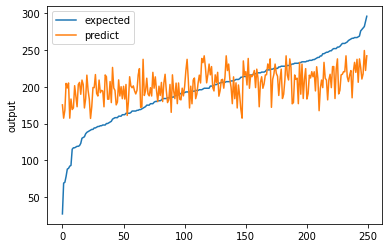

In [0]:
#Now lets draw a regression chart to see which part we can modify to increase the precision
#Regression Chart
%matplotlib inline
def chart_regression(pred,y,sort=True):
  t=pd.DataFrame({"pred":pred,"y":y.flatten()})
  if sort:
    t.sort_values(by=['y'],inplace=True)
  plt.plot(t['y'].tolist(),label="expected")
  plt.plot(t['pred'].tolist(),label="predict")
  plt.ylabel("output")
  plt.legend()
  plt.show()

chart_regression(pred.flatten(),y_test)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


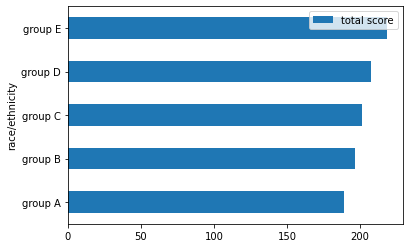

In [0]:
import seaborn as sns
df2 = pd.read_csv("/content/drive/My Drive/StudentsPerformance.csv")
df2["total score"] = df2["math score"]+df2["reading score"]+df2["writing score"]
df2_race = df2.groupby(by=["race/ethnicity"],as_index=False).mean()[["race/ethnicity","total score"]]
df2_race.plot(kind="barh",x="race/ethnicity",y="total score")

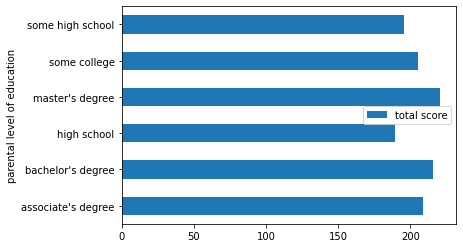

In [0]:
df2_race = df2.groupby(by=["parental level of education"],as_index=False).mean()[["parental level of education","total score"]]
df2_race.plot(kind="barh",x="parental level of education",y="total score")

In [0]:
# As most prediction method showed on kaggle 
# https://www.kaggle.com/spscientist/students-performance-in-exams/kernels
# It is almost impossible we predict students' performance on these several categorical vars.
# So friends, working hard definitely works.